In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_afternoon_strategy import (
    TSMyoAfternoonStrategy,
)
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoAfternoonStrategy, {})

2019-12-13 11:34:53.918745	开始加载历史数据
2019-12-13 11:34:54.220437	加载进度： [2%]
2019-12-13 11:34:54.492201	加载进度： [3%]
2019-12-13 11:34:54.794475	加载进度： [5%]
2019-12-13 11:34:55.097751	加载进度： [7%]
2019-12-13 11:34:55.445573	加载进度： [8%]
2019-12-13 11:34:55.721824	加载进度： [10%]
2019-12-13 11:34:56.108752	加载进度：# [12%]
2019-12-13 11:34:56.425688	加载进度：# [13%]
2019-12-13 11:34:56.720984	加载进度：# [15%]
2019-12-13 11:34:57.048380	加载进度：# [16%]
2019-12-13 11:34:57.364669	加载进度：# [18%]
2019-12-13 11:34:57.684466	加载进度：# [20%]
2019-12-13 11:34:58.024775	加载进度：## [21%]
2019-12-13 11:34:58.268997	加载进度：## [23%]
2019-12-13 11:34:58.588354	加载进度：## [25%]
2019-12-13 11:34:58.972615	加载进度：## [26%]
2019-12-13 11:34:59.253646	加载进度：## [28%]
2019-12-13 11:34:59.543439	加载进度：## [30%]
2019-12-13 11:34:59.978747	加载进度：### [31%]
2019-12-13 11:35:00.268018	加载进度：### [33%]
2019-12-13 11:35:00.557281	加载进度：### [35%]
2019-12-13 11:35:00.800011	加载进度：### [36%]
2019-12-13 11:35:01.232065	加载进度：### [38%]
2019-12-13 11:35:01.533856	加载进度：### [39

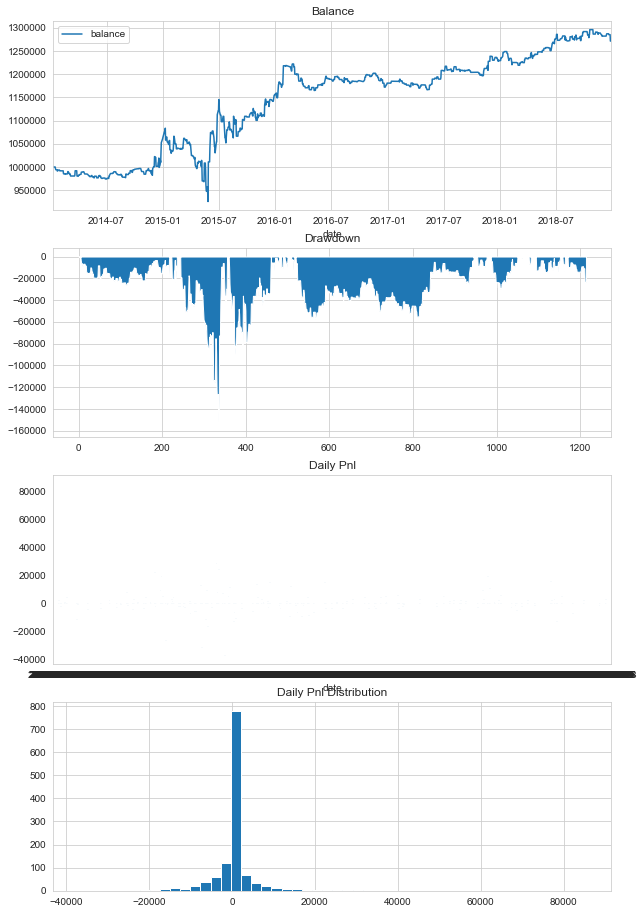

In [3]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [7]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("atr_stop", 1, 4, 0.5)
setting.add_parameter("trailing_stop", 0.2, 0.6, 0.1)
setting.add_parameter("range_wide", 0.15, 0.35, 0.05)

engine.run_optimization(setting)

2019-12-13 12:09:57.941365	参数：{'atr_stop': 1, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1264199146391776
2019-12-13 12:09:57.941365	参数：{'atr_stop': 3.0, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1170499761041446
2019-12-13 12:09:57.941365	参数：{'atr_stop': 3.5, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1170499761041446
2019-12-13 12:09:57.941365	参数：{'atr_stop': 4.0, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1170499761041446
2019-12-13 12:09:57.941365	参数：{'atr_stop': 1.5, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1152173616065746
2019-12-13 12:09:57.941365	参数：{'atr_stop': 2.0, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.1152082188307288
2019-12-13 12:09:57.941365	参数：{'atr_stop': 2.5, 'trailing_stop': 0.4, 'range_wide': 0.35}, 目标：1.11501967148503
2019-12-13 12:09:57.941365	参数：{'atr_stop': 3.0, 'trailing_stop': 0.4, 'range_wide': 0.3}, 目标：1.070066421273127
2019-12-13 12:09:57.941365	参数：{'atr_stop': 3.5, 'trailing_stop': 0.4, 'range_wide': 0.3}, 目标：1.0700664

[("{'atr_stop': 1, 'trailing_stop': 0.4, 'range_wide': 0.35}",
  1.1264199146391776,
  {'start_date': datetime.date(2014, 1, 9),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 1215,
   'profit_days': 292,
   'loss_days': 320,
   'capital': 1000000,
   'end_balance': 1544626.2766000004,
   'max_drawdown': -73013.73179999948,
   'max_ddpercent': -5.43479249654211,
   'max_drawdown_duration': 23,
   'total_net_pnl': 544626.2766000013,
   'daily_net_pnl': 448.25207950617386,
   'total_commission': 161273.7234,
   'daily_commission': 132.7355748148148,
   'total_slippage': 304200.0,
   'daily_slippage': 250.37037037037038,
   'total_turnover': 5375790780.0,
   'daily_turnover': 4424519.160493827,
   'total_trade_count': 5070,
   'daily_trade_count': 4.172839506172839,
   'total_return': 54.46262766000005,
   'annual_return': 10.758049908148159,
   'daily_return': 0.03578452583710237,
   'return_std': 0.4921534884738664,
   'sharpe_ratio': 1.1264199146391776,
   'return_drawdow

2019-12-13 12:12:29.458275	开始加载历史数据
2019-12-13 12:12:29.458275	加载进度： [2%]
2019-12-13 12:12:29.458275	加载进度： [3%]
2019-12-13 12:12:29.458275	加载进度： [5%]
2019-12-13 12:12:29.458275	加载进度： [7%]
2019-12-13 12:12:29.458275	加载进度： [8%]
2019-12-13 12:12:29.458275	加载进度： [10%]
2019-12-13 12:12:29.458275	加载进度：# [12%]
2019-12-13 12:12:29.458275	加载进度：# [13%]
2019-12-13 12:12:29.458275	加载进度：# [15%]
2019-12-13 12:12:29.458275	加载进度：# [16%]
2019-12-13 12:12:29.458275	加载进度：# [18%]
2019-12-13 12:12:29.458275	加载进度：# [20%]
2019-12-13 12:12:29.458275	加载进度：## [21%]
2019-12-13 12:12:29.458275	加载进度：## [23%]
2019-12-13 12:12:29.458275	加载进度：## [25%]
2019-12-13 12:12:29.458275	加载进度：## [26%]
2019-12-13 12:12:29.458275	加载进度：## [28%]
2019-12-13 12:12:29.458275	加载进度：## [30%]
2019-12-13 12:12:29.458275	加载进度：### [31%]
2019-12-13 12:12:29.458275	加载进度：### [33%]
2019-12-13 12:12:29.458275	加载进度：### [35%]
2019-12-13 12:12:29.458275	加载进度：### [36%]
2019-12-13 12:12:29.458275	加载进度：### [38%]
2019-12-13 12:12:29.458275	加载进度：### [39

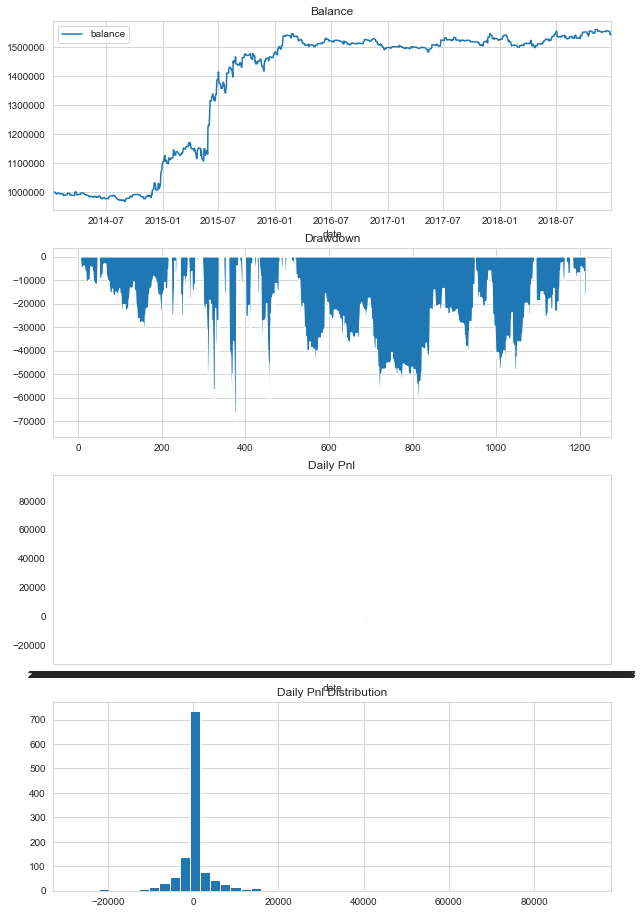

In [8]:
#%%
#%%
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoAfternoonStrategy,{'range_wide': 0.35, 'atr_stop': 1, 'trailing_stop': 0.4})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()